In [1]:
#!pip3 install ucimlrepo

In [2]:
#!pip3 install --upgrade certifi


In [3]:
import os
import certifi

# specify the certificate bundle manually
os.environ['SSL_CERT_FILE'] = certifi.where()

import urllib.request

url = "https://archive.ics.uci.edu/dataset/222/bank+marketing"
response = urllib.request.urlopen(url)
data = response.read()
print(data)


b'<!DOCTYPE html>\n<html lang="en" data-theme="light">\n  <head>\n    <meta charset="UTF-8" />\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n\n    <meta name="description" content="Discover datasets around the world!" />\n\n    <link rel="icon" href="/favicon.ico" />\n\n    <link rel="apple-touch-icon" href="/apple-touch-icon.png" />\n\n    <!-- Provides metadata used when the app is installed on a mobile device or desktop. -->\n    <!-- See https://developers.google.com/web/fundamentals/web-app-manifest/ -->\n    <link rel="manifest" href="/manifest.json" />\n\n    <title>UCI Machine Learning Repository</title>\n\n    \n\t\t<link href="../../_app/immutable/assets/0.f3ca67f3.css" rel="stylesheet">\n\t\t<link href="../../_app/immutable/assets/Autocomplete.3d8e18c6.css" rel="stylesheet">\n\t\t<link href="../../_app/immutable/assets/Stars.206d776b.css" rel="stylesheet">\n\t\t<link href="../../_app/immutable/assets/JsonDiff.1d197e4a.css" rel="stylesheet">

In [4]:
from ucimlrepo import fetch_ucirepo
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [5]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [6]:
data = pd.read_csv('../data/bank+marketing/bank/bank-full.csv', sep=';') # define separator

In [7]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [8]:
# size & structure of data
*data.shape,\
data.columns

(45211,
 17,
 Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'y'],
       dtype='object'))

In [9]:
data.head() # return the first n rows (default=5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Statistics

In [11]:
data.describe().round(2) # for numerical data

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [12]:
# percentiles are used to understand the distribution of data (only for numerical values)
# they tell you what percentage of data points fall below a certain value
# percentiles are computed by quantile() in pandas

numeric_data = data.select_dtypes(include=['number'])
numeric_data.quantile([.1, .3, .5, .7])


,age,balance,day,duration,campaign,pdays,previous
0.1,29.0,0.0,5.0,58.0,1.0,-1.0,0.0
0.3,34.0,131.0,10.0,117.0,1.0,-1.0,0.0
0.5,39.0,448.0,16.0,180.0,2.0,-1.0,0.0
0.7,46.0,1126.0,20.0,280.0,3.0,-1.0,0.0


## Duplicates

In [13]:
data.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [14]:
data.size

768587

## Missing Values


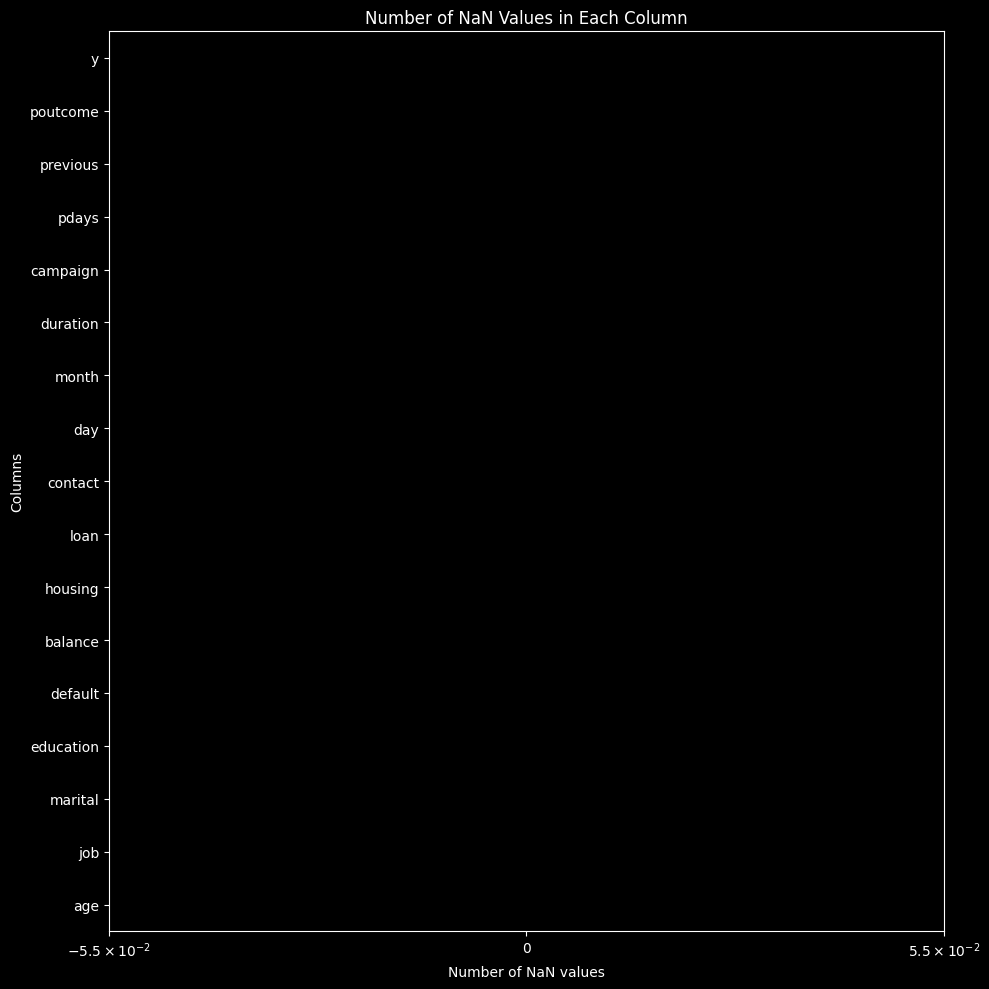

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
data.isna().sum().plot.barh(ax=ax)

# logarithmnic scale to include negative values
ax.set_xscale('symlog')

ax.set_xlabel('Number of NaN values')
ax.set_ylabel('Columns')
ax.set_title('Number of NaN Values in Each Column')

plt.tight_layout()
plt.show()

In [16]:
# missing values per column
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [18]:
# see uknown features

unknown_columns = [col for col in categorical_columns if data[col].isin(['unknown']).any()]
unknown_columns

['job', 'education', 'contact', 'poutcome']

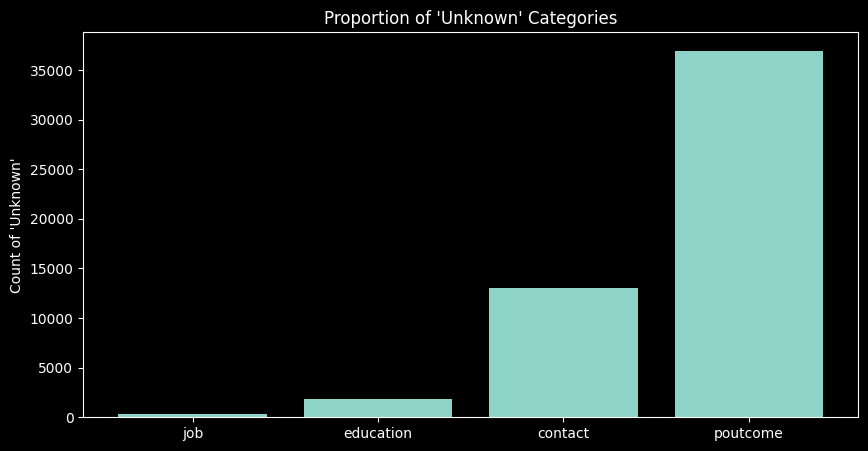

In [19]:
unknown_counts = {}
for column in unknown_columns:
    unknown_counts[column] = data[column].isin(['unknown']).sum()

plt.figure(figsize=(10, 5))
plt.bar(unknown_counts.keys(), unknown_counts.values())
plt.title("Proportion of 'Unknown' Categories")
plt.ylabel("Count of 'Unknown'")
plt.show()


### Job

In [20]:
# job
data.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [21]:
# remove job 'unknown' since only 288 unknown

data = data[data['job'] != 'unknown']
data.job.value_counts(sort=True)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64

### Education

In [22]:
# education
data.education.value_counts()

education
secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: count, dtype: int64

In [23]:
from sklearn.impute import SimpleImputer

data['education'] = data['education'].replace('unknown', np.nan)
imputer = SimpleImputer(strategy='most_frequent')
data['education'] = imputer.fit_transform(data[['education']]).ravel()

/var/folders/rj/413hs5ks2qs0d5nqq306gwjw0000gn/T/ipykernel_7528/3566021680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'] = data['education'].replace('unknown', np.nan)
/var/folders/rj/413hs5ks2qs0d5nqq306gwjw0000gn/T/ipykernel_7528/3566021680.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'] = imputer.fit_transform(data[['education']]).ravel()


### Contact

In [24]:
# contact
data.contact.value_counts()

contact
cellular     29154
unknown      12909
telephone     2860
Name: count, dtype: int64

In [25]:
data['contact'] = data['contact'].replace('unknown', np.nan)
imputer = SimpleImputer(strategy='most_frequent')
data['contact'] = imputer.fit_transform(data[['contact']]).ravel()

/var/folders/rj/413hs5ks2qs0d5nqq306gwjw0000gn/T/ipykernel_7528/999328929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['contact'] = data['contact'].replace('unknown', np.nan)
/var/folders/rj/413hs5ks2qs0d5nqq306gwjw0000gn/T/ipykernel_7528/999328929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['contact'] = imputer.fit_transform(data[['contact']]).ravel()


### Poutcome

In [26]:
# poutcome
data.poutcome.value_counts()

poutcome
unknown    36704
failure     4881
other       1838
success     1500
Name: count, dtype: int64

In [27]:
data = data.drop(columns=['poutcome'])

In [28]:
print(data.isin(['unknown']).sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64


## Data Smoothing / Removing Outliers

In [29]:
numeric_data = data.select_dtypes(include=['number']).columns.tolist()

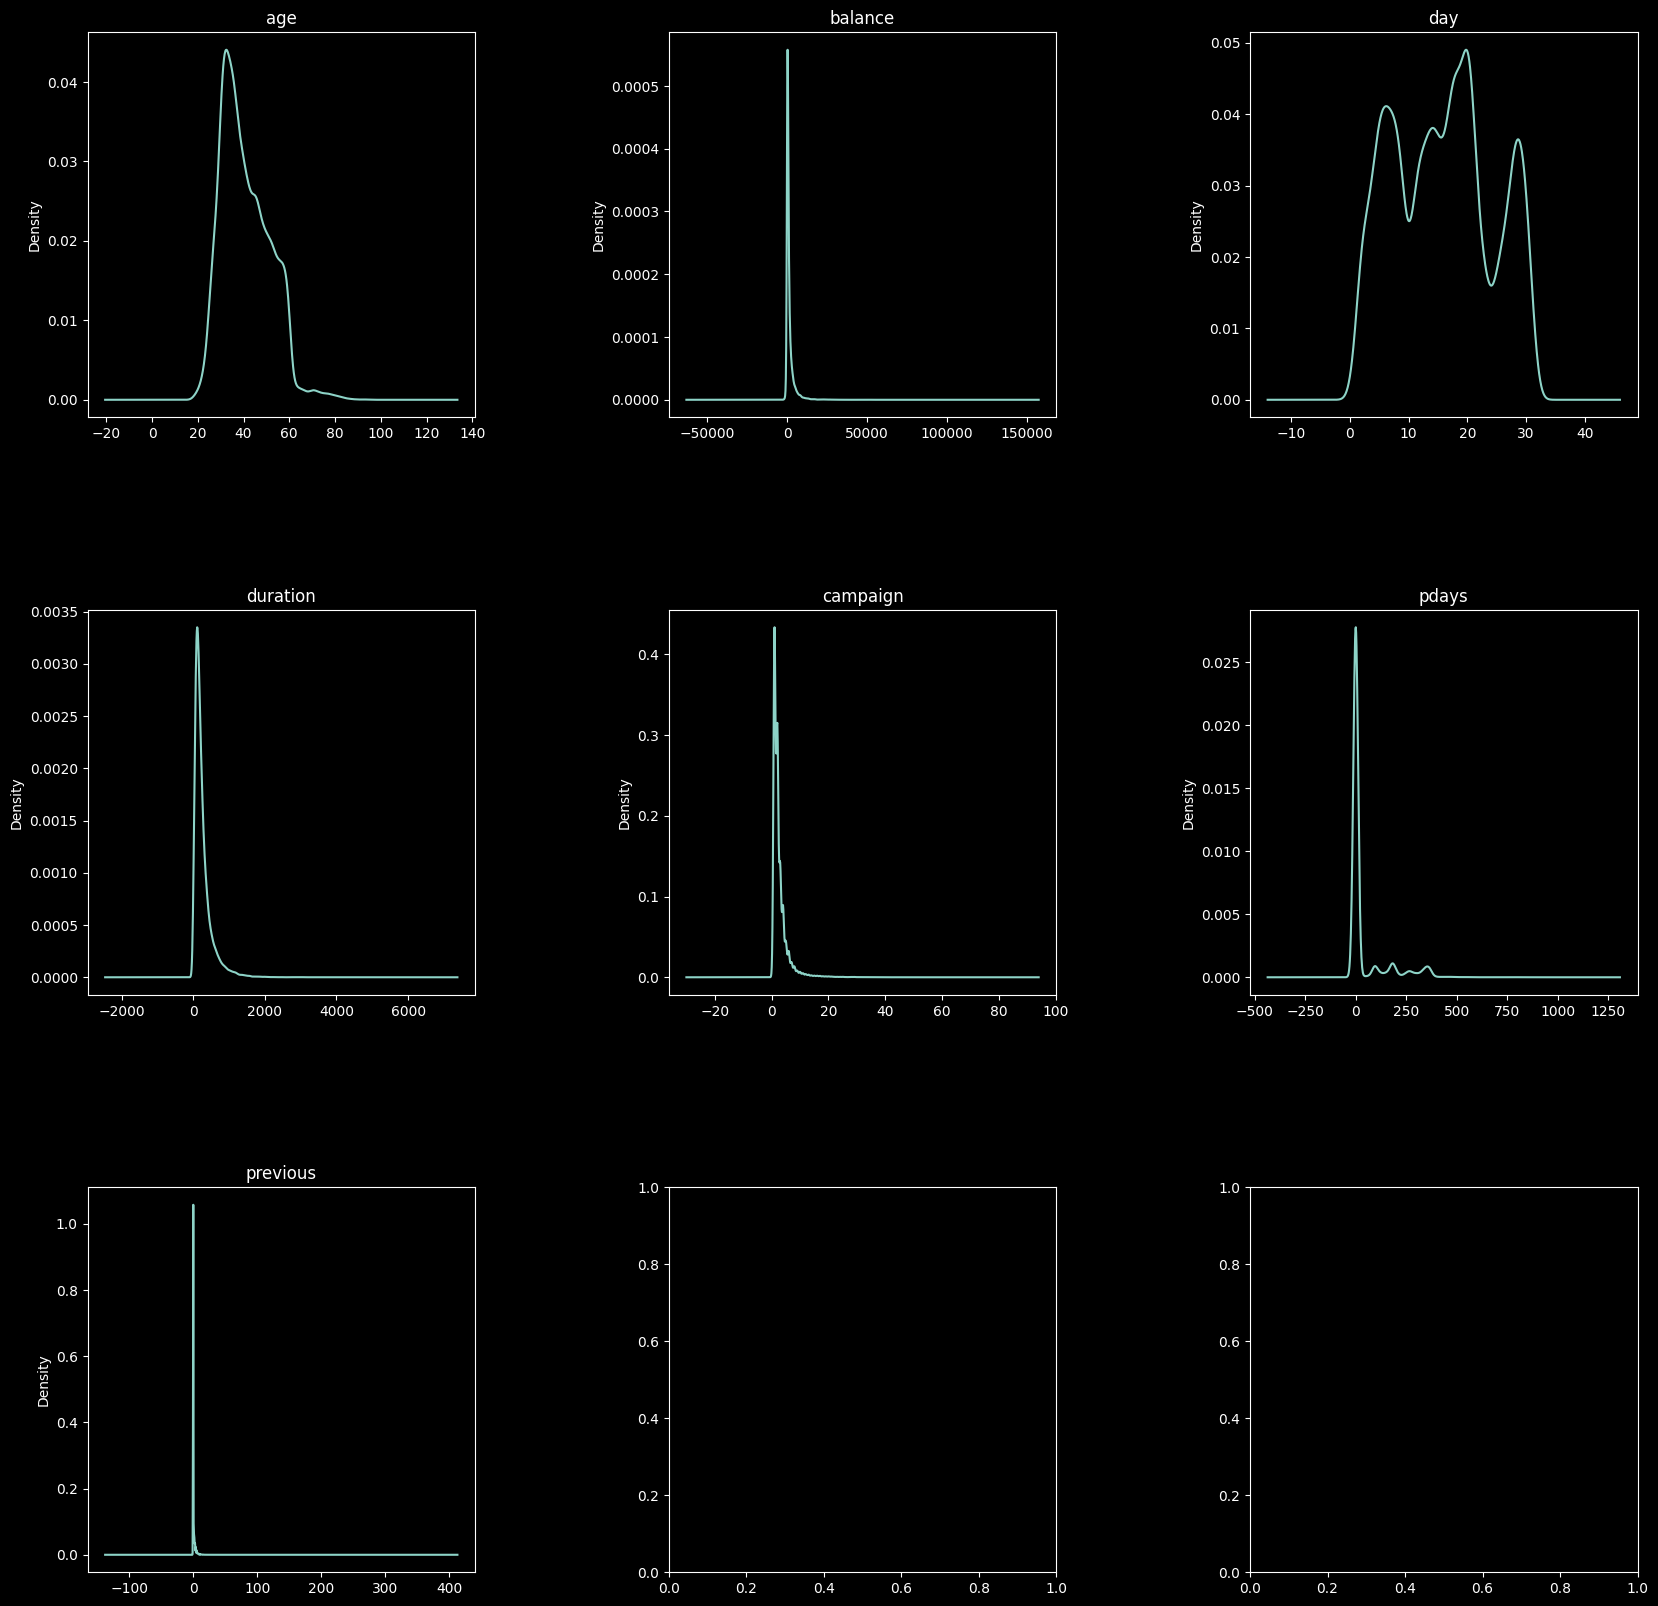

In [30]:
fig, ax = plt.subplots(3,3, figsize=(20,20))

for idx, (ax_i, feat) in enumerate(zip(ax.flatten(), numeric_data)):
    data[feat].plot.density(ax=ax_i)
    ax_i.set_title(feat)

fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

age            Axes(0.125,0.653529;0.227941x0.226471)
balance     Axes(0.398529,0.653529;0.227941x0.226471)
day         Axes(0.672059,0.653529;0.227941x0.226471)
duration       Axes(0.125,0.381765;0.227941x0.226471)
campaign    Axes(0.398529,0.381765;0.227941x0.226471)
pdays       Axes(0.672059,0.381765;0.227941x0.226471)
previous           Axes(0.125,0.11;0.227941x0.226471)
dtype: object

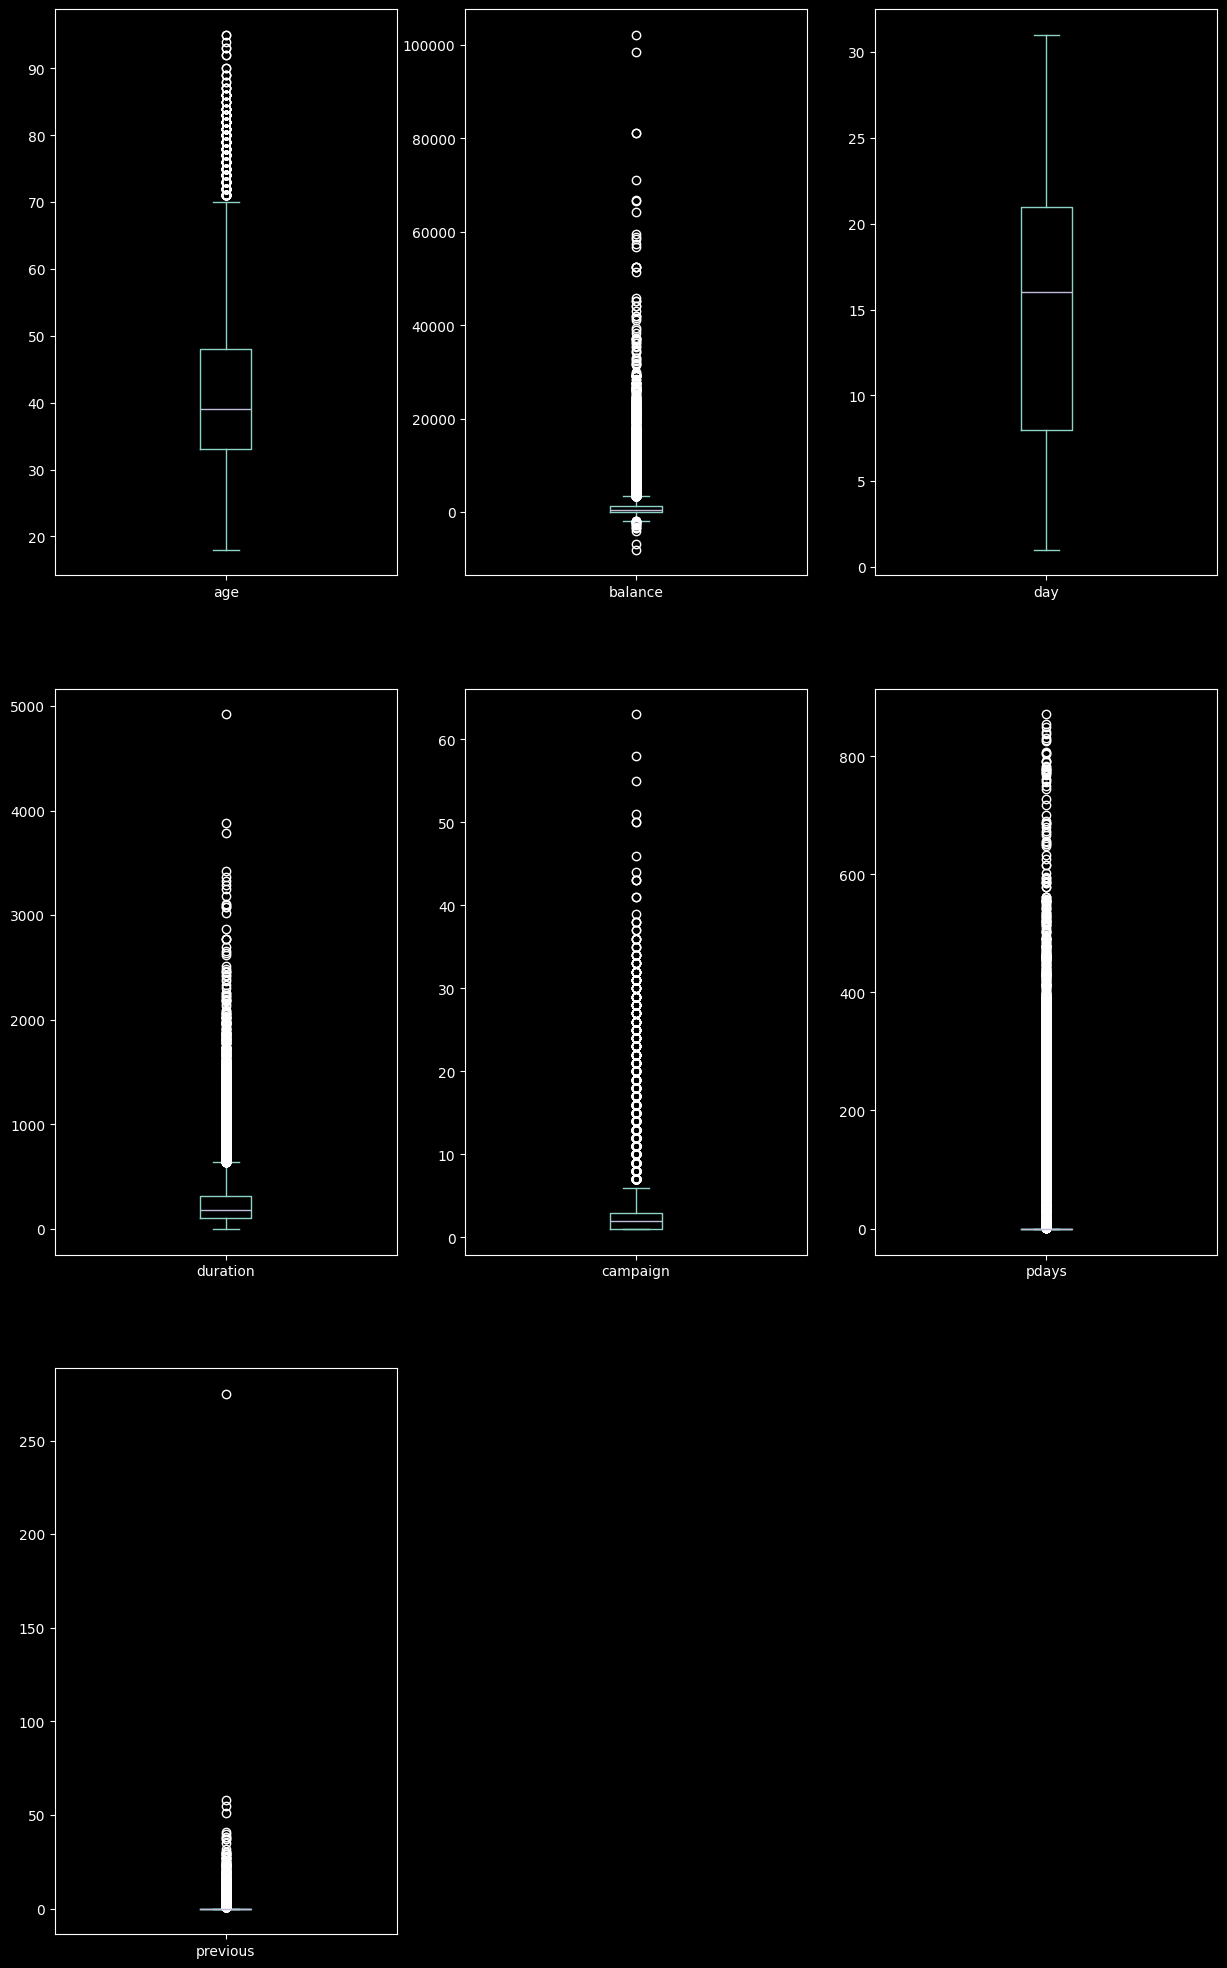

In [31]:
data.plot(kind="box", subplots=True, figsize=(15, 25), layout=(3, 3))

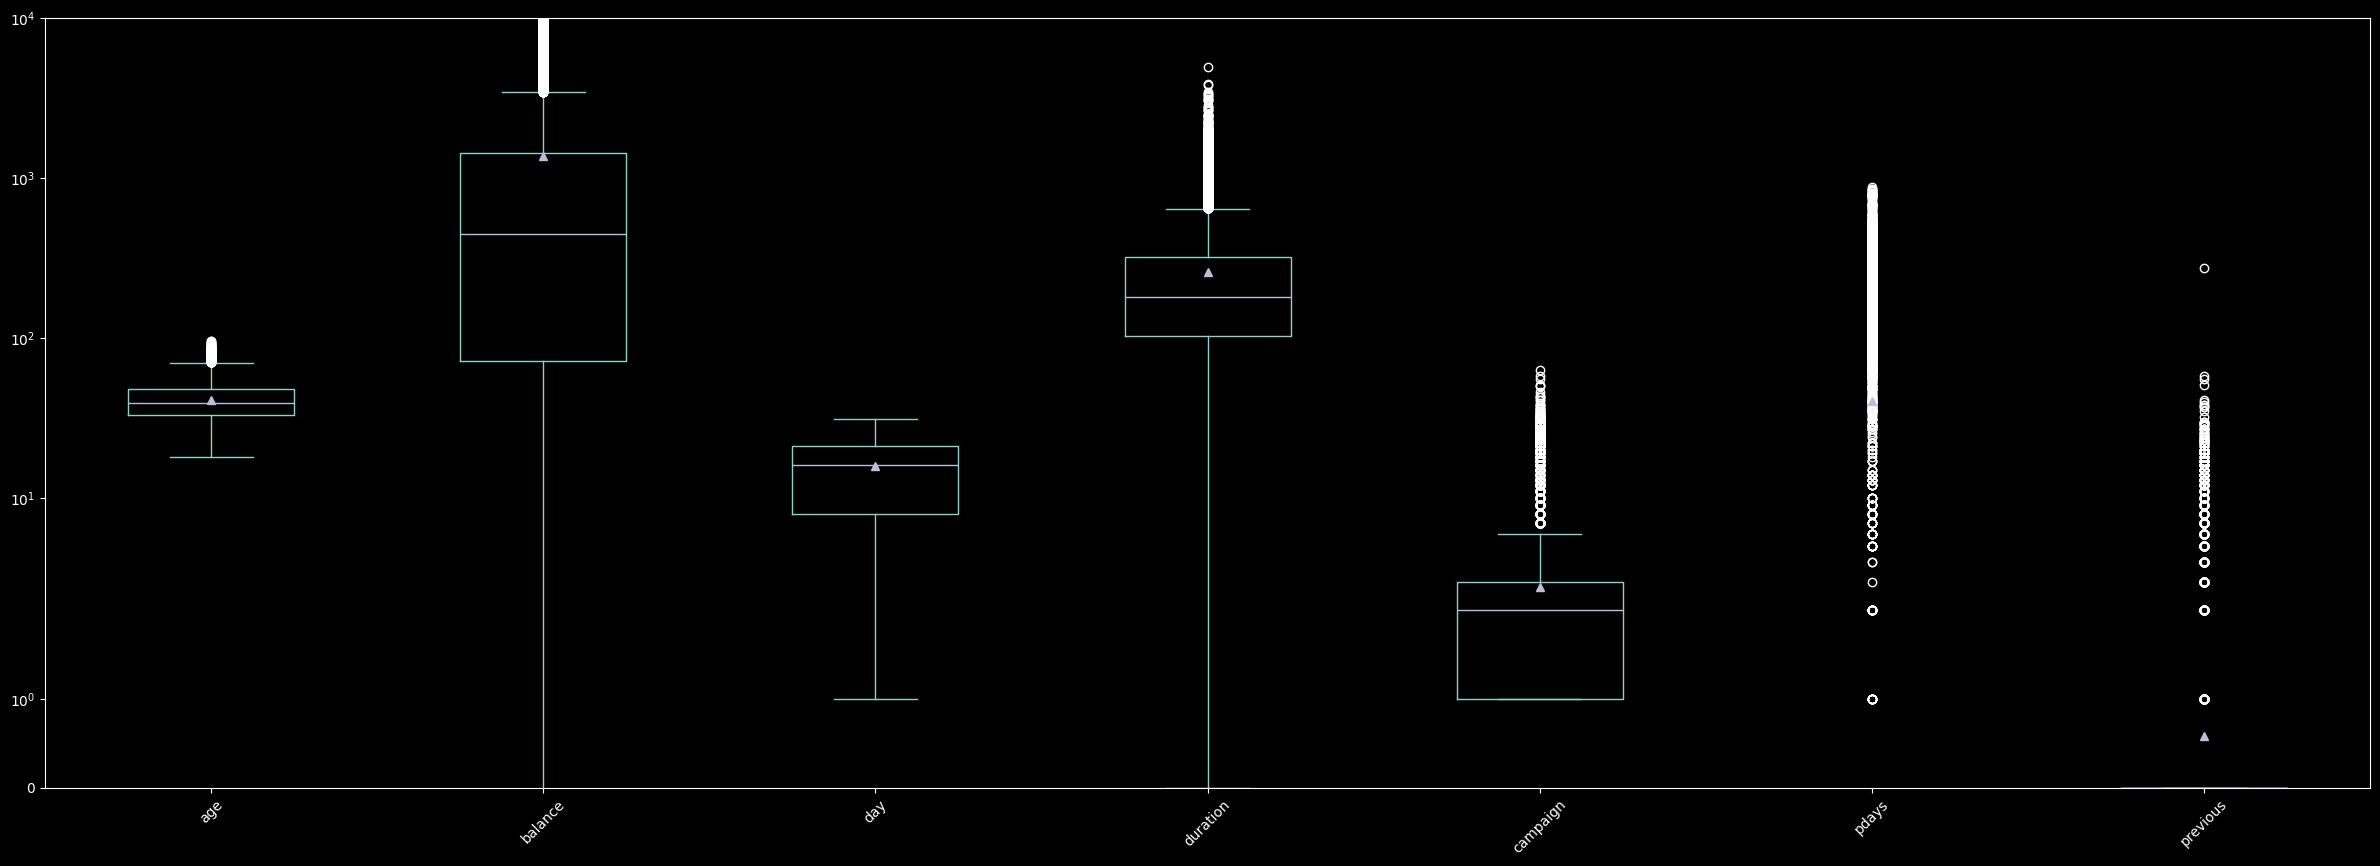

In [32]:
fig, ax = plt.subplots(1,1, figsize=(30,10))

data[data.columns].plot.box(ax=ax, rot=45, showmeans=True)

ax.set_ylim(0, 10000)
ax.set_yscale('symlog')

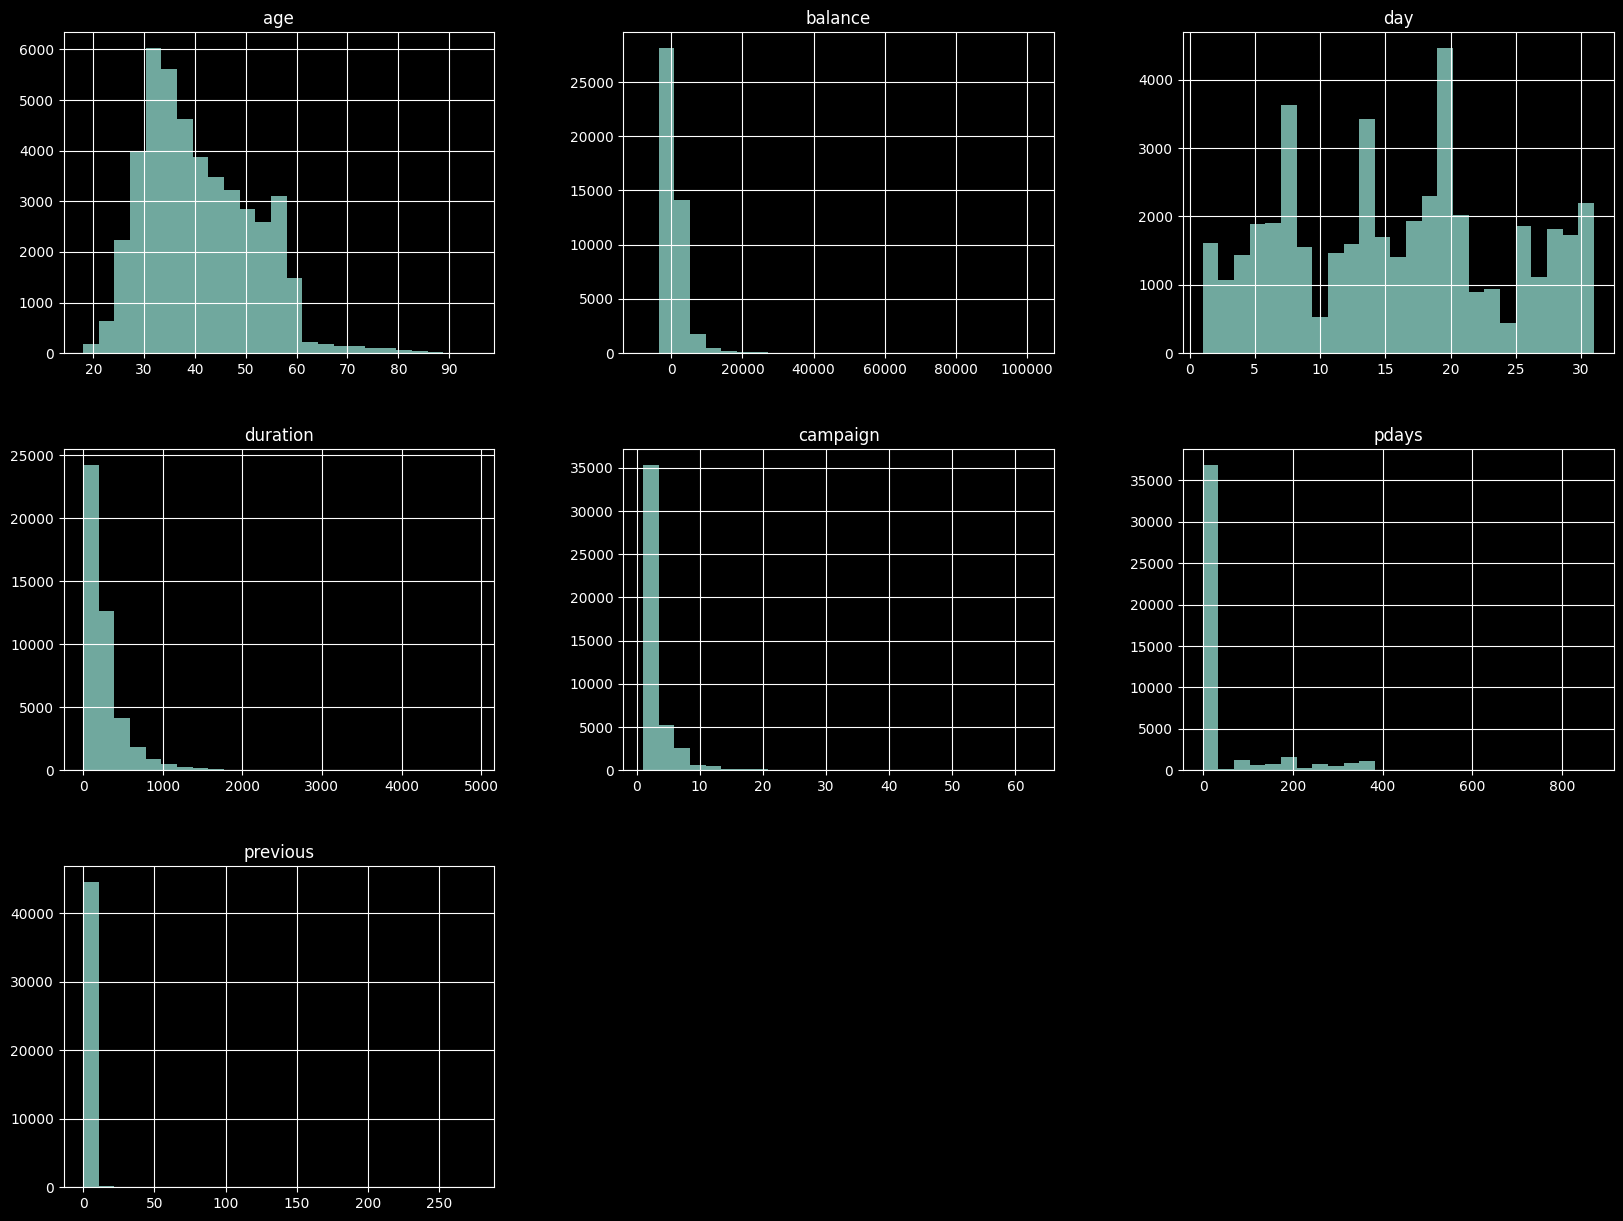

In [33]:
data.hist(bins = 25,figsize=(20,15), alpha=0.8)
plt.show()

### Age

In [34]:
data.age.describe()

count    44923.000000
mean        40.893529
std         10.604399
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [35]:
# find age outliers

feat = 'age'

# based on iqr method
q25, q75 = data.describe()[feat][['25%', '75%']]
iqr = q75 - q25

outliers = data.loc[~data.age.between(q25 - 1.5*iqr, q75 + 1.5*iqr, inclusive='both')].copy()

print(f"Original data shape: {data.shape}")

outliers

Original data shape: (44923, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,no
29261,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,no
29263,75,retired,married,primary,no,3324,no,no,cellular,2,feb,149,1,-1,0,no
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,283,2,-1,0,no
29865,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45163,71,retired,married,secondary,no,2064,no,no,cellular,9,nov,379,2,92,3,no
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes


In [36]:
# remove age outliers
data = data.loc[data.index.isin(outliers.index) == False]

print(f"Original data shape: {data.shape}")

Original data shape: (44443, 16)


### Balance

In [37]:
data.balance.describe()

count     44443.000000
mean       1342.482236
std        2982.923889
min       -8019.000000
25%          70.000000
50%         441.000000
75%        1403.000000
max      102127.000000
Name: balance, dtype: float64

In [38]:
# find balance outliers

feat = 'balance'

# based on iqr method
q97 = data[feat].quantile(0.97)
q3 = data[feat].quantile(0.03)
iqr = q97 - q3

outliers = data.loc[~data.balance.between(q3 - 1.5*iqr, q97 + 1.5*iqr, inclusive='both')].copy()

print(f"Original data shape: {data.shape}")

outliers

Original data shape: (44443, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
334,45,management,divorced,tertiary,no,24598,yes,no,cellular,5,may,313,3,-1,0,no
446,39,technician,single,secondary,no,45248,yes,no,cellular,6,may,1623,1,-1,0,yes
920,44,admin.,married,secondary,no,58544,yes,no,cellular,7,may,144,2,-1,0,no
2343,26,technician,single,secondary,no,24299,yes,no,cellular,13,may,704,1,-1,0,no
2554,28,technician,single,secondary,no,26765,no,no,cellular,13,may,210,8,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43672,42,management,married,tertiary,no,27696,no,no,cellular,12,may,176,2,89,5,yes
43945,63,retired,married,secondary,no,23047,no,no,cellular,17,jun,530,1,139,2,no
44232,45,management,married,tertiary,no,31472,no,no,cellular,19,jul,568,7,-1,0,yes
44521,42,management,married,tertiary,no,27696,no,no,cellular,11,aug,370,1,91,7,yes


In [39]:
# remove balance outliers
data = data.loc[data.index.isin(outliers.index) == False]

print(f"Original data shape: {data.shape}")

Original data shape: (44252, 16)


In [40]:
data.balance.describe()

count    44252.000000
mean      1221.357069
std       2194.266436
min      -8019.000000
25%         69.000000
50%        437.000000
75%       1384.000000
max      19690.000000
Name: balance, dtype: float64

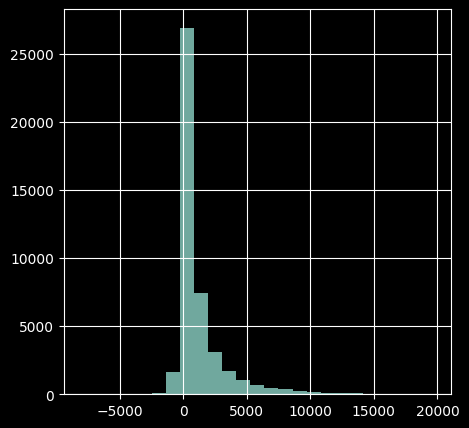

In [41]:
data.balance.hist(bins = 25,figsize=(5,5), alpha=0.8)
plt.show()

In [42]:
# find balance outliers 2

feat = 'balance'

# based on iqr method
q15 = data[feat].quantile(0.15)
q85 = data[feat].quantile(0.85)
iqr = q85 - q15

outliers = data.loc[~data.balance.between(q15 - 1.5*iqr, q85 + 1.5*iqr, inclusive='both')].copy()

print(f"Original data shape: {data.shape}")

outliers

Original data shape: (44252, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
34,51,management,married,tertiary,no,10635,yes,no,cellular,5,may,336,1,-1,0,no
65,51,management,married,tertiary,no,6530,yes,no,cellular,5,may,91,1,-1,0,no
69,35,blue-collar,single,secondary,no,12223,yes,yes,cellular,5,may,177,1,-1,0,no
382,40,management,married,secondary,no,8486,no,no,cellular,6,may,260,3,-1,0,no
391,37,technician,married,tertiary,no,8730,yes,no,cellular,6,may,149,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45097,61,self-employed,married,tertiary,no,10861,no,no,cellular,25,oct,225,1,91,5,yes
45098,44,technician,single,secondary,no,11115,no,no,cellular,25,oct,189,1,185,4,no
45110,50,management,married,tertiary,no,8205,yes,no,telephone,25,oct,293,3,508,1,no
45127,67,blue-collar,married,secondary,no,16353,no,no,cellular,27,oct,223,2,-1,0,no


In [43]:
# remove balance outliers 2
data = data.loc[data.index.isin(outliers.index) == False]

print(f"Original data shape: {data.shape}")

Original data shape: (42433, 16)


## Day
Nothing can be done beacuse a day feature cannot have outliers 

## Duration


In [44]:
data.duration.describe()

count    42433.000000
mean       256.782881
std        256.206147
min          0.000000
25%        103.000000
50%        179.000000
75%        317.000000
max       3881.000000
Name: duration, dtype: float64

In [45]:
# remove all calls with duration < 2
data = data.loc[data['duration'] > 2]

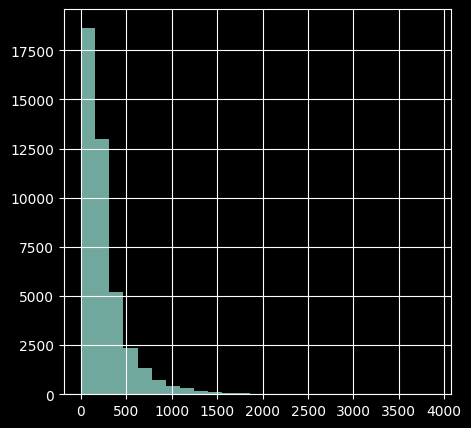

In [46]:
data.duration.hist(bins = 25,figsize=(5,5), alpha=0.8)
plt.show()

In [47]:
# find duration outliers

feat = 'duration'

# based on iqr method
q25, q75 = data.describe()[feat][['25%', '75%']]
iqr = q75 - q25

outliers = data.loc[~data.duration.between(q25 - 1.5*iqr, q75 + 1.5*iqr, inclusive='both')].copy()

print(f"Original data shape: {data.shape}")

outliers

Original data shape: (42426, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
37,53,technician,married,secondary,no,-3,no,no,cellular,5,may,1666,1,-1,0,no
43,54,retired,married,secondary,no,529,yes,no,cellular,5,may,1492,1,-1,0,no
53,42,admin.,single,secondary,no,-76,yes,no,cellular,5,may,787,1,-1,0,no
59,46,services,married,primary,no,179,yes,no,cellular,5,may,1778,1,-1,0,no
61,53,technician,divorced,secondary,no,989,yes,no,cellular,5,may,812,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45085,25,technician,single,secondary,no,325,no,no,cellular,22,oct,716,3,-1,0,yes
45124,27,blue-collar,single,primary,no,232,yes,no,cellular,26,oct,701,2,-1,0,yes
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,yes


In [48]:
# remove duration outliers
data = data.loc[data.index.isin(outliers.index) == False]

print(f"Original data shape: {data.shape}")

Original data shape: (39382, 16)


## Campaign

In [49]:
data.campaign.describe()

count    39382.000000
mean         2.781042
std          3.132114
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

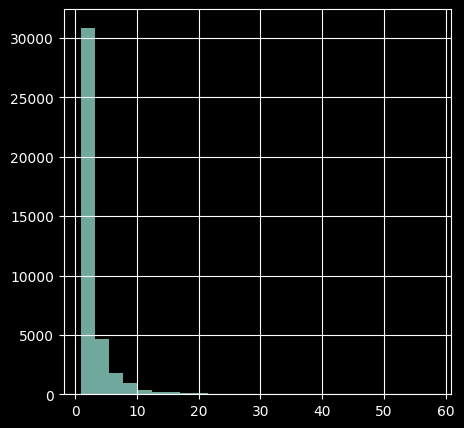

In [50]:
data.campaign.hist(bins = 25,figsize=(5,5), alpha=0.8)
plt.show()

In [51]:
# find campaign outliers

feat = 'campaign'

# based on iqr method
q85 = data[feat].quantile(0.85)
q15 = data[feat].quantile(0.15)
iqr = q85 - q15

outliers = data.loc[~data.campaign.between(q15 - 1.5*iqr, q85 + 1.5*iqr, inclusive='both')].copy()

print(f"Original data shape: {data.shape}")

outliers

min_outlier = outliers[feat].min()
min_outlier


Original data shape: (39382, 16)


9

In [52]:
# remove campaign outliers
data = data.loc[data.index.isin(outliers.index) == False]

print(f"Original data shape: {data.shape}")

Original data shape: (37793, 16)


## Previous

In [53]:
data.previous.describe()

count    37793.000000
mean         0.595190
std          2.376533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

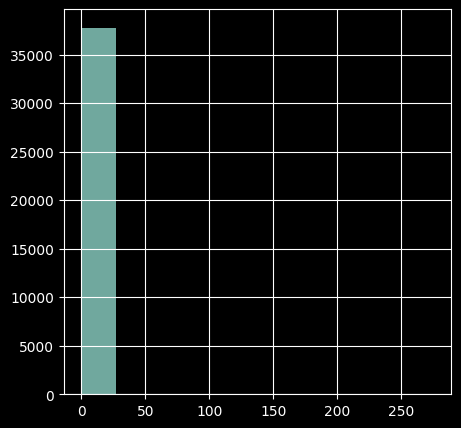

In [54]:
data.previous.hist(bins = 10,figsize=(5,5), alpha=0.8)
plt.show()

In [55]:
# remove 275 outlier
data = data[data['previous'] != 275]

In [56]:
# find previous outliers

feat = 'previous'

# based on iqr method
q85 = data[feat].quantile(0.85)
q15 = data[feat].quantile(0.15)
iqr = q85 - q15

outliers = data.loc[~data.previous.between(q15 - 1.5*iqr, q85 + 1.5*iqr, inclusive='both')].copy()

print(f"Original data shape: {data.shape}")

outliers

min_outlier = outliers[feat].min()
min_outlier


Original data shape: (37792, 16)


3

In [57]:
# remove previous outliers
data = data.loc[data.index.isin(outliers.index) == False]

print(f"Original data shape: {data.shape}")

Original data shape: (34919, 16)


## Visualizations


  * ### Features' Histogram

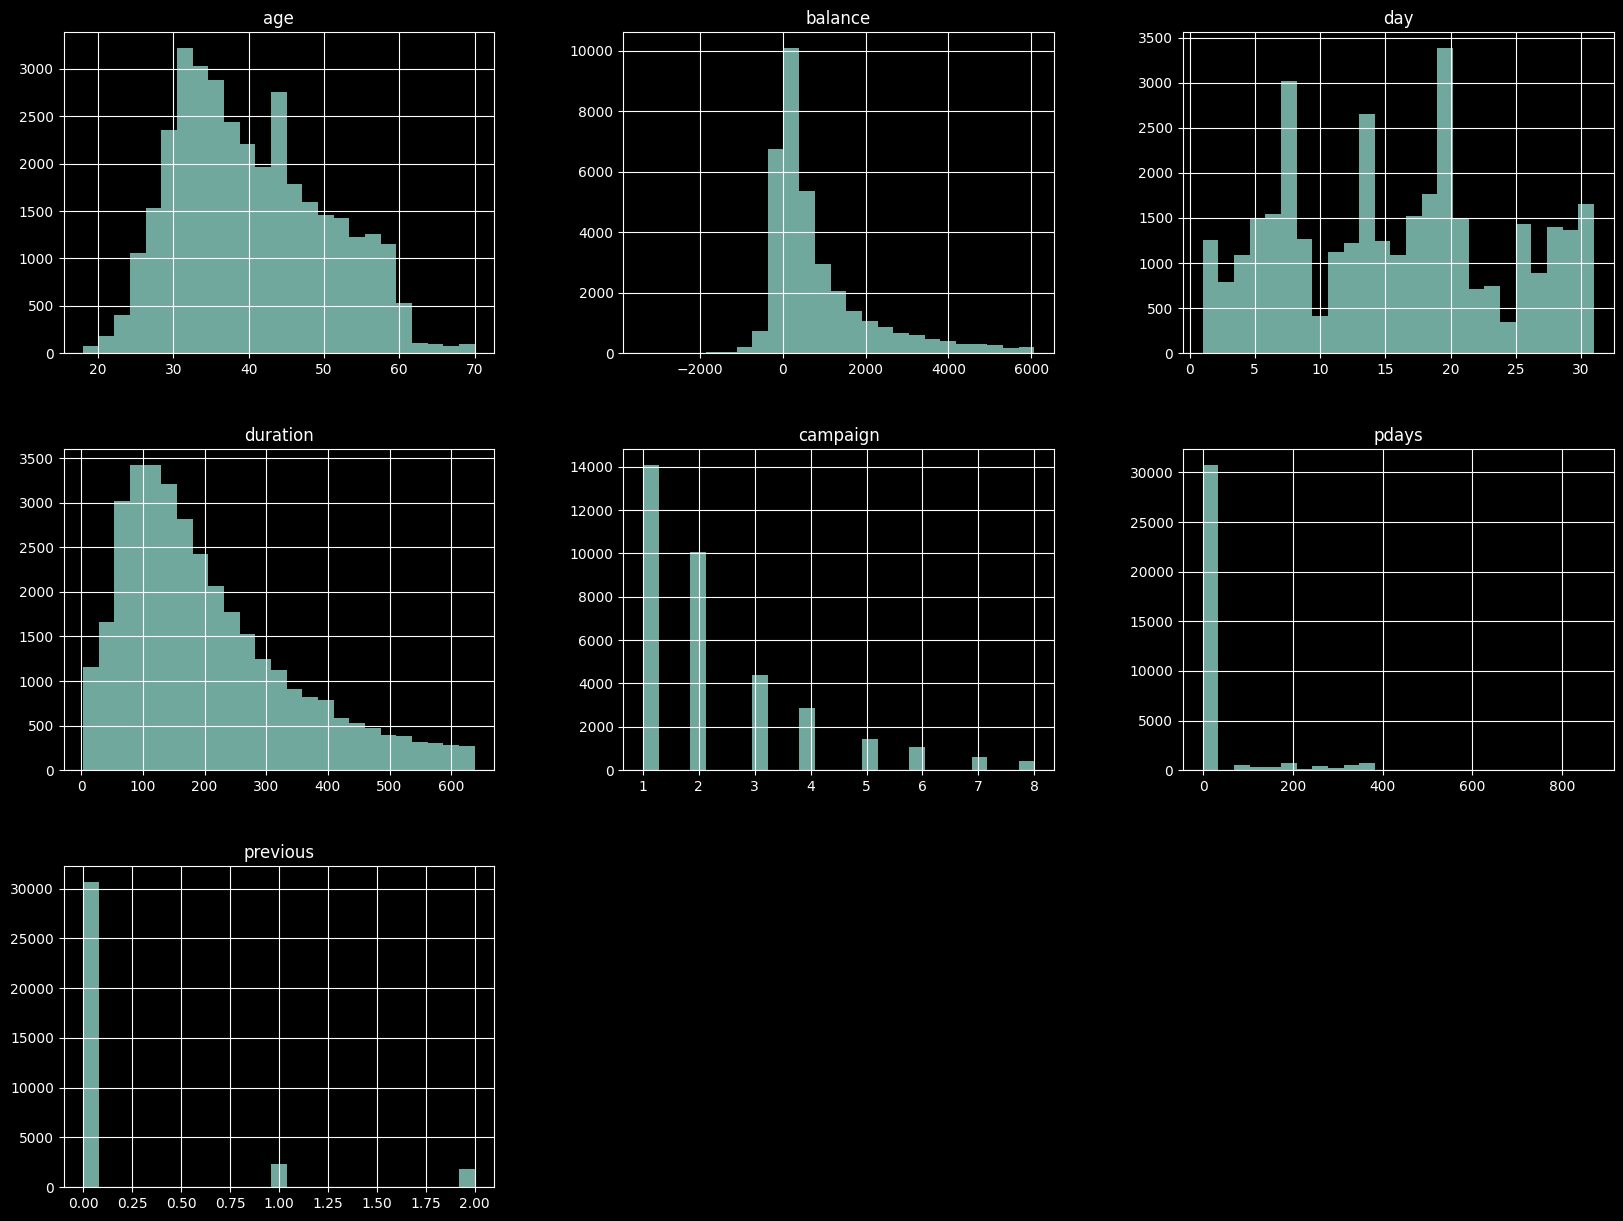

In [58]:
data.hist(bins = 25,figsize=(20,15), alpha=0.8)
plt.show()

* ### Features' Density

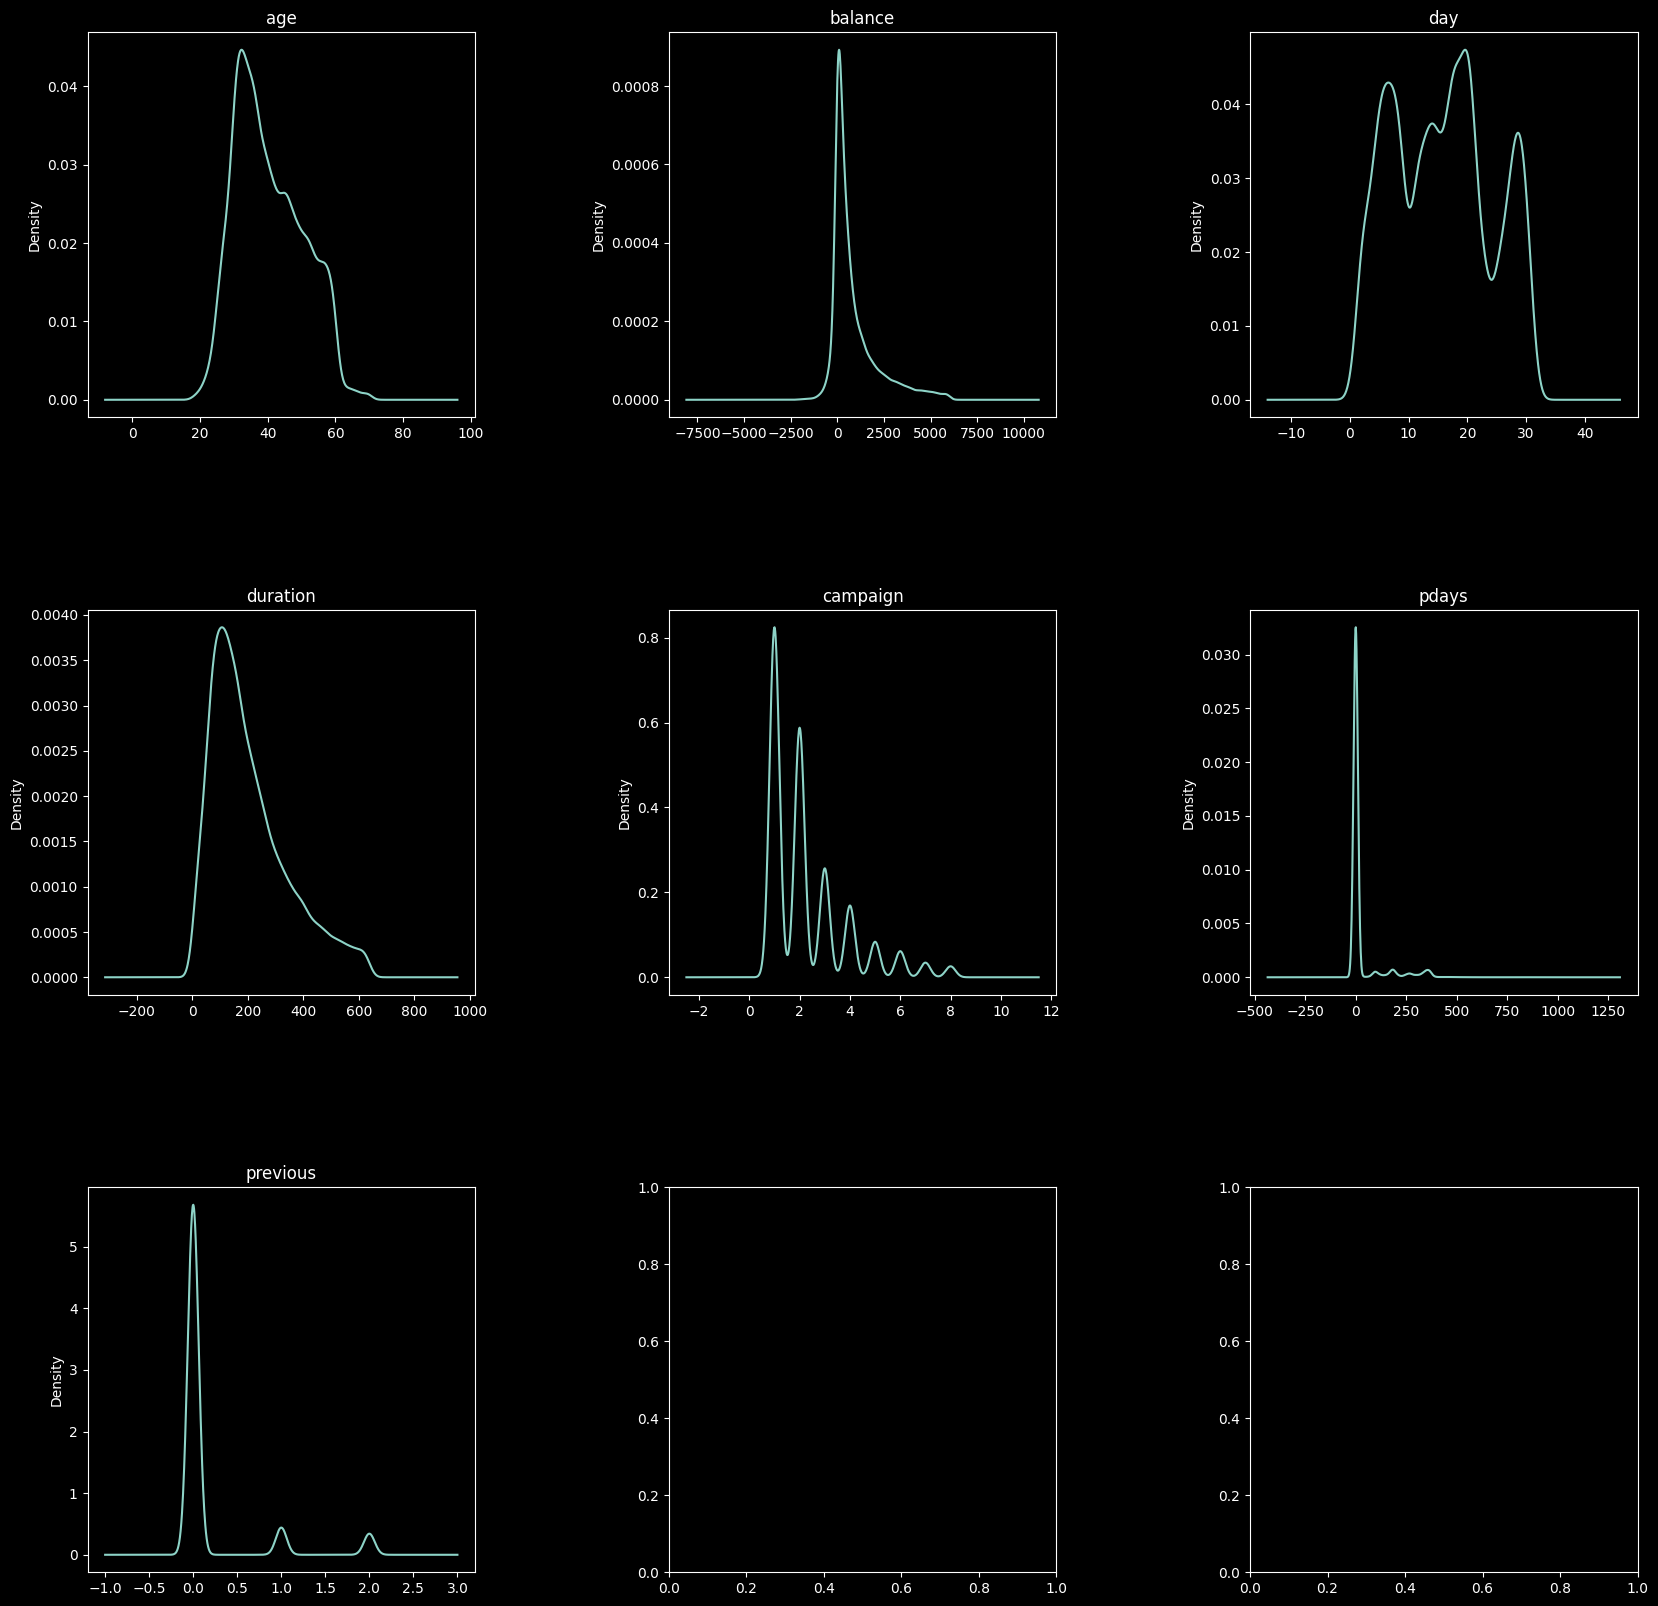

In [59]:
fig, ax = plt.subplots(3,3, figsize=(20,20))

for idx, (ax_i, feat) in enumerate(zip(ax.flatten(), numeric_data)):
    data[feat].plot.density(ax=ax_i)
    ax_i.set_title(feat)

fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

  * ### Features' Pie Chart

In [60]:
data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [61]:
data.marital.value_counts(sort=False)

marital
married     20982
single       9897
divorced     4040
Name: count, dtype: int64

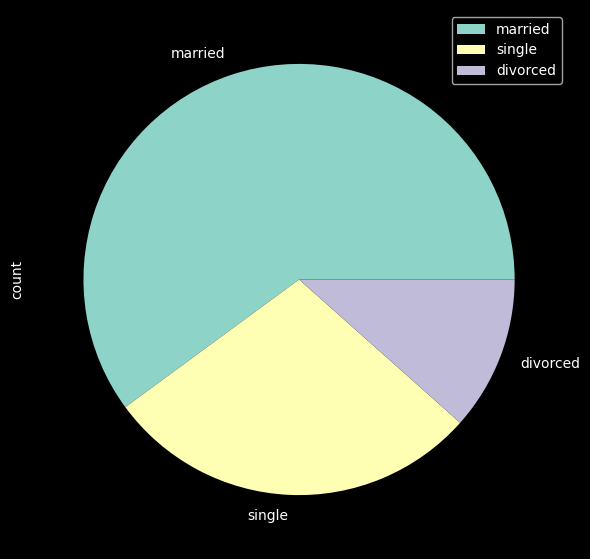

In [62]:
out = data.marital.value_counts(sort=True)

fig, ax = plt.subplots(1,1, figsize=(7,7))
out.plot.pie(legend=True, ax=ax)
plt.show()

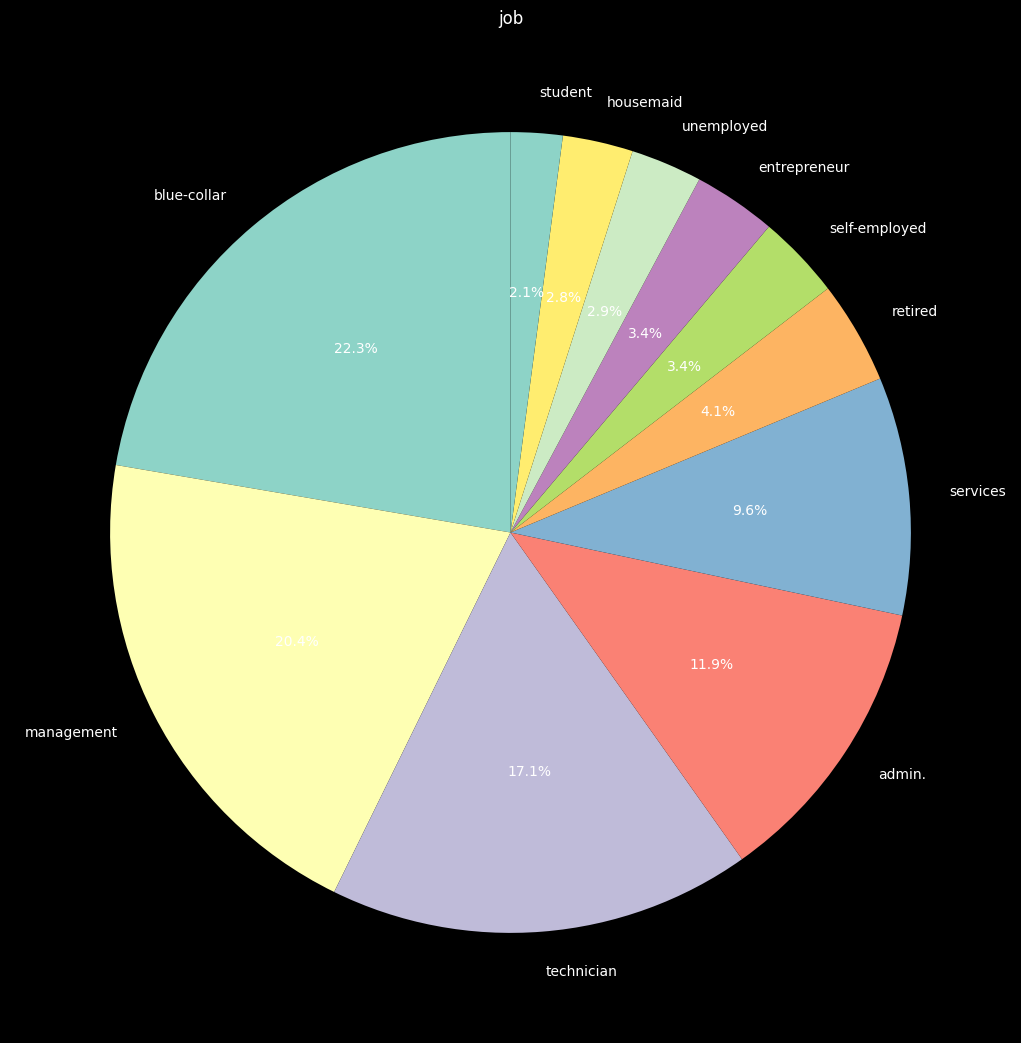

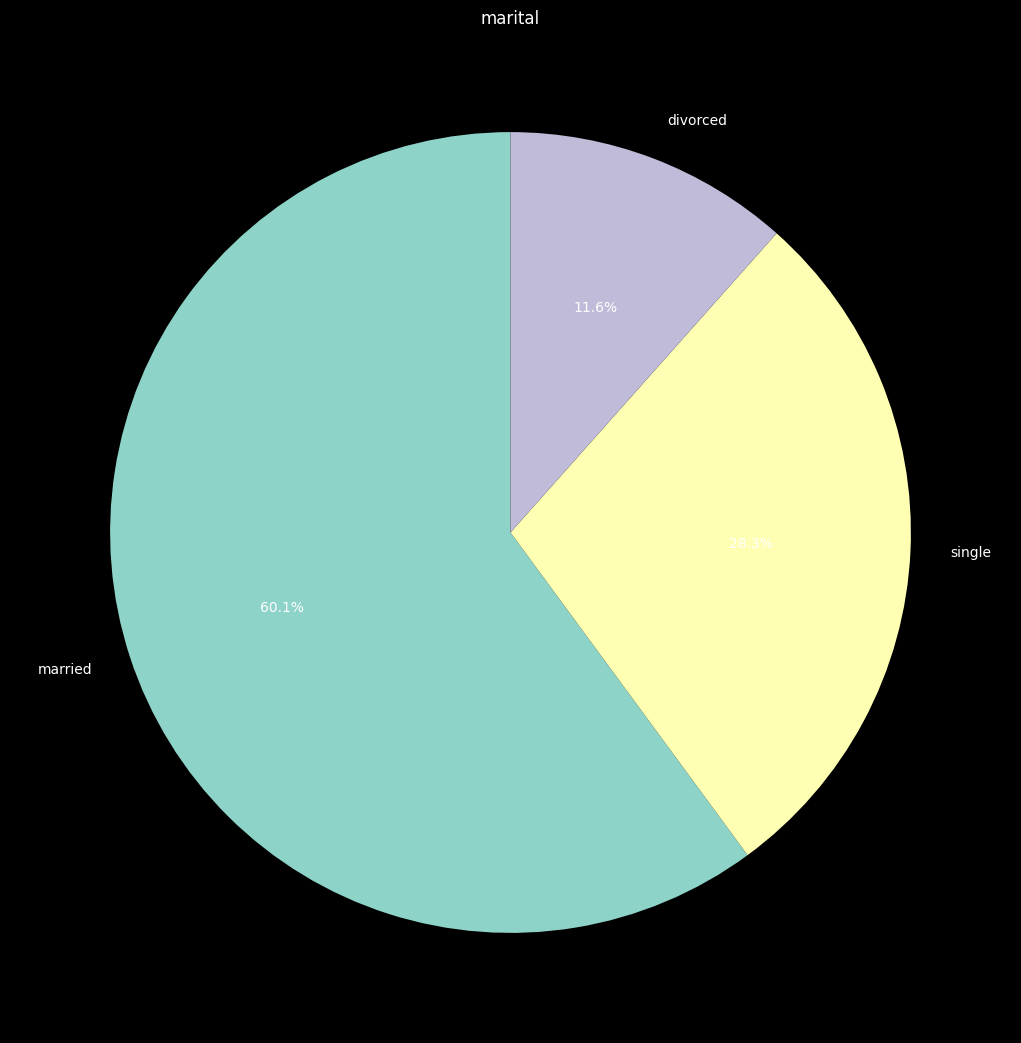

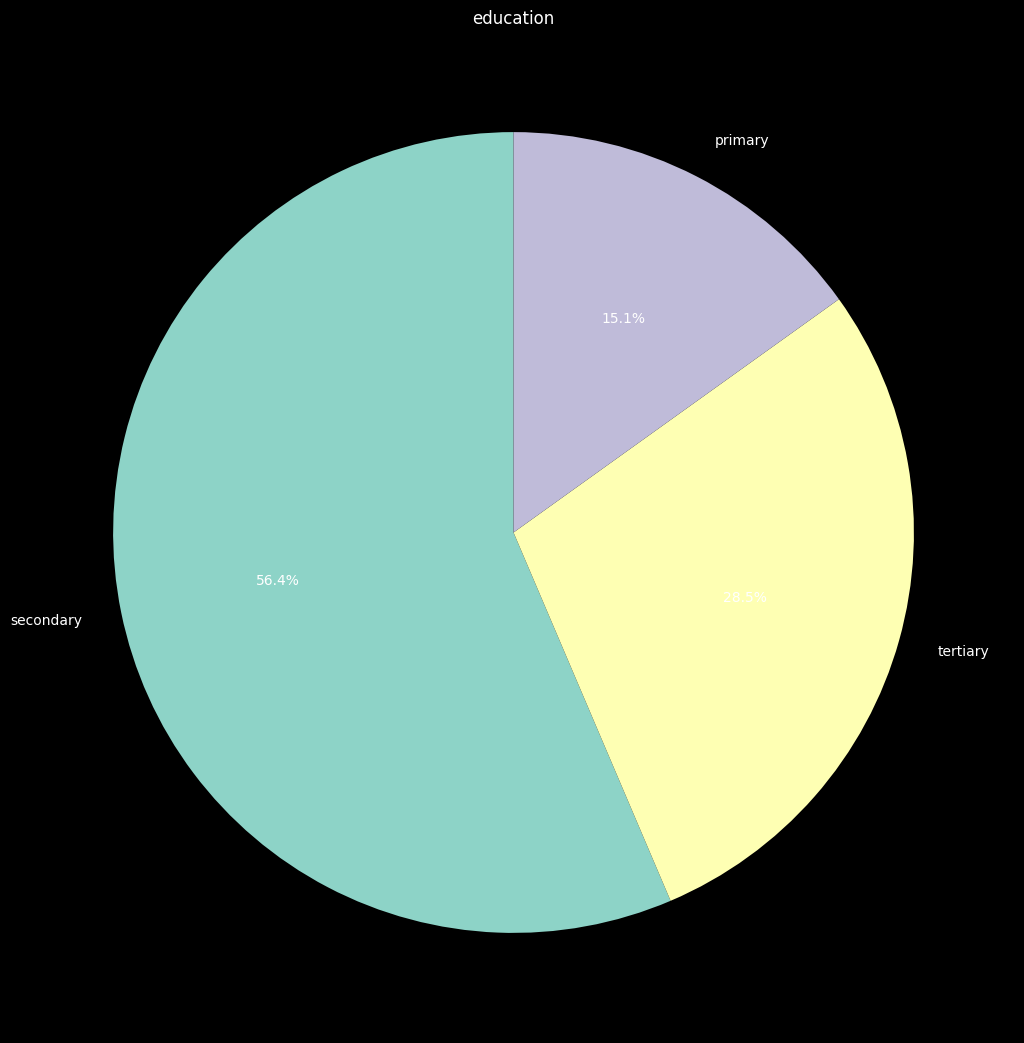

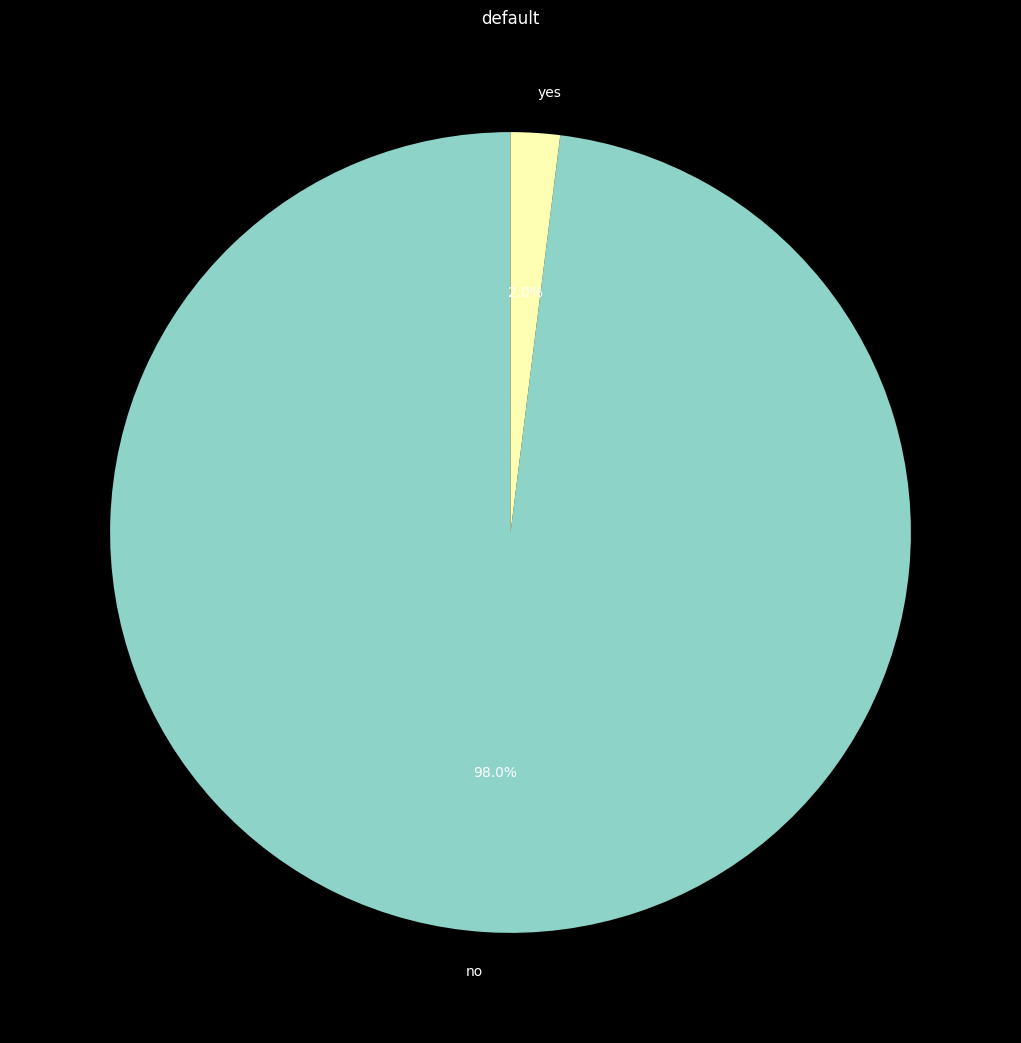

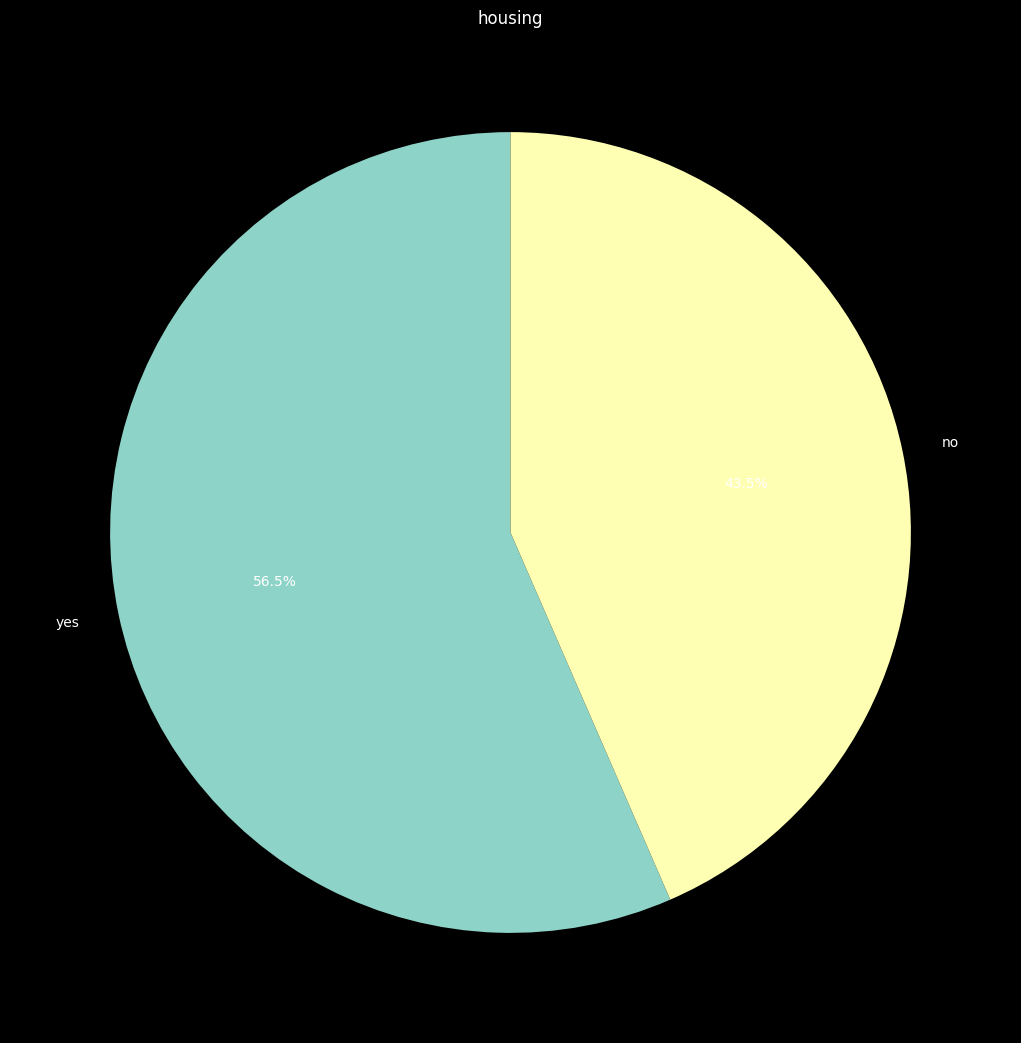

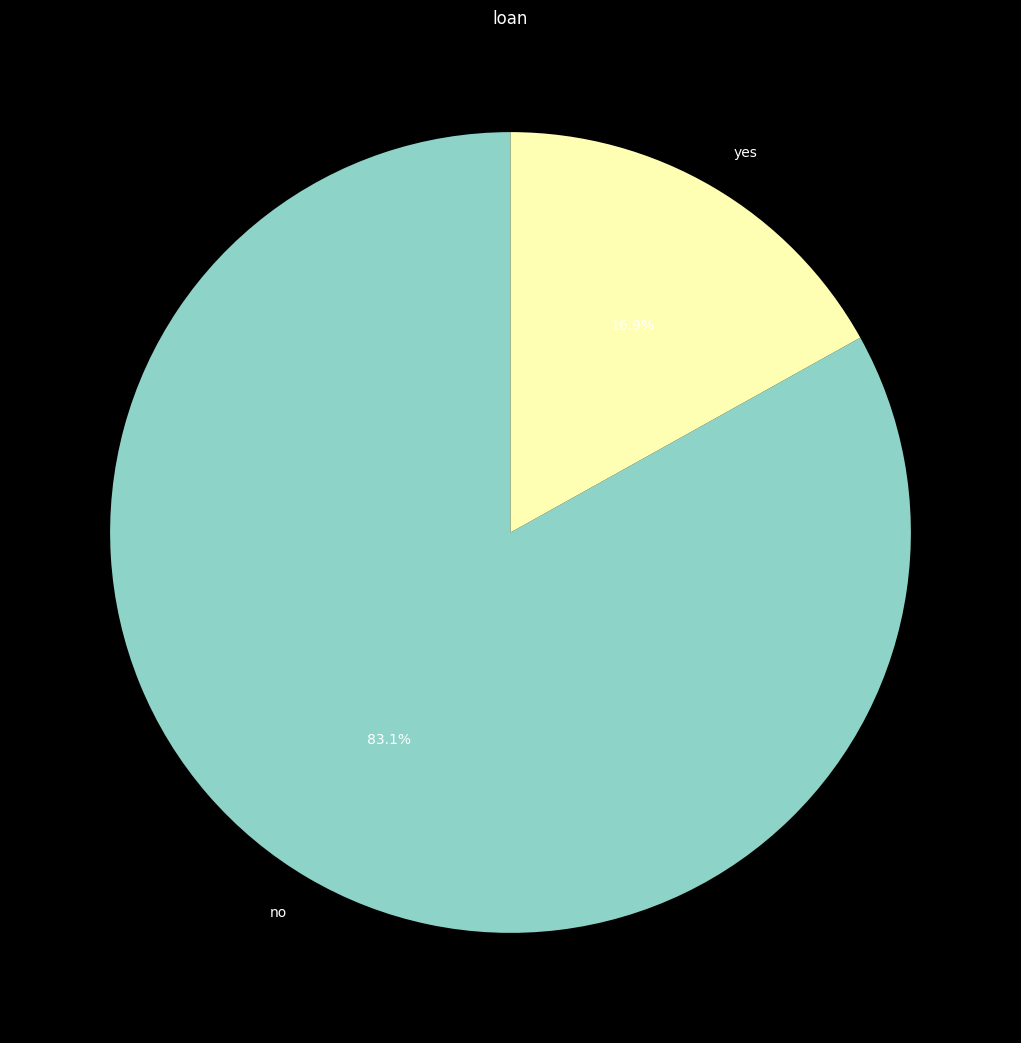

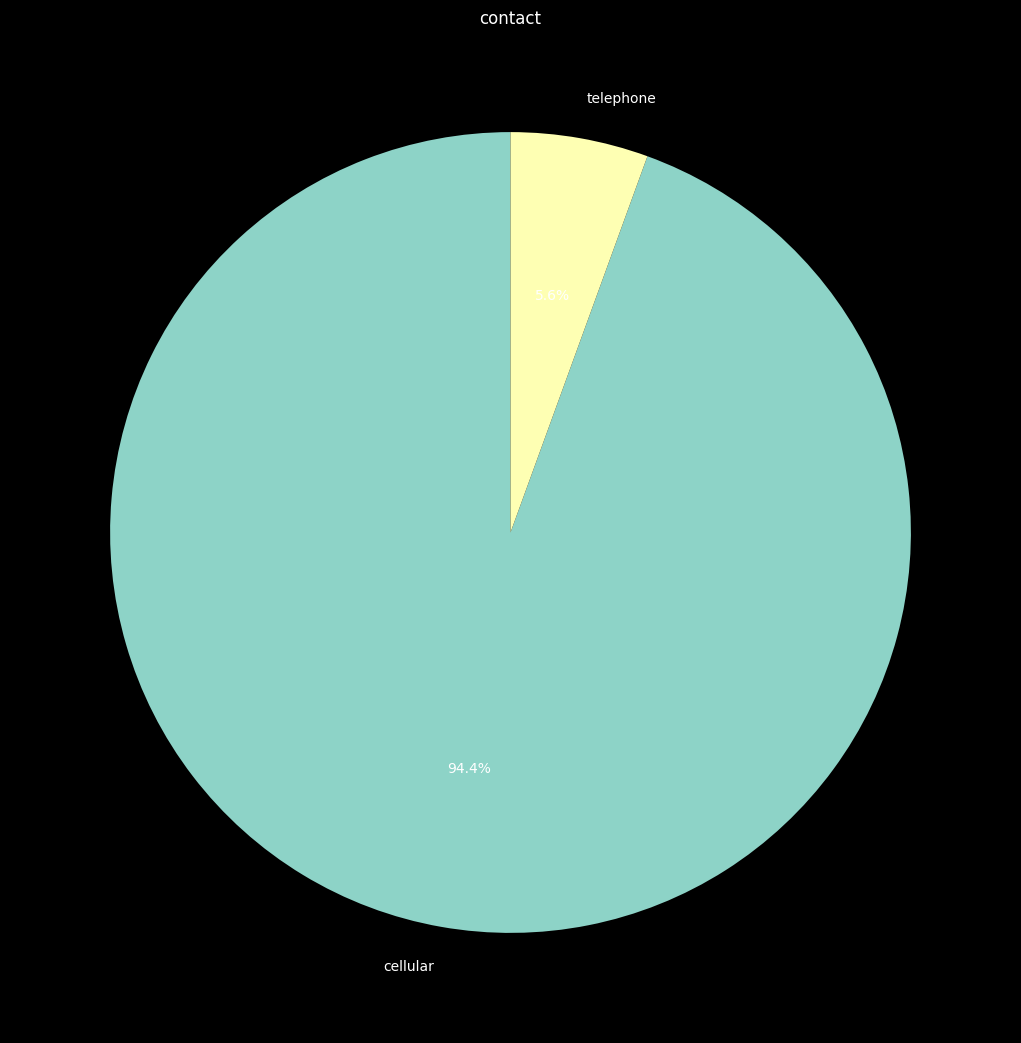

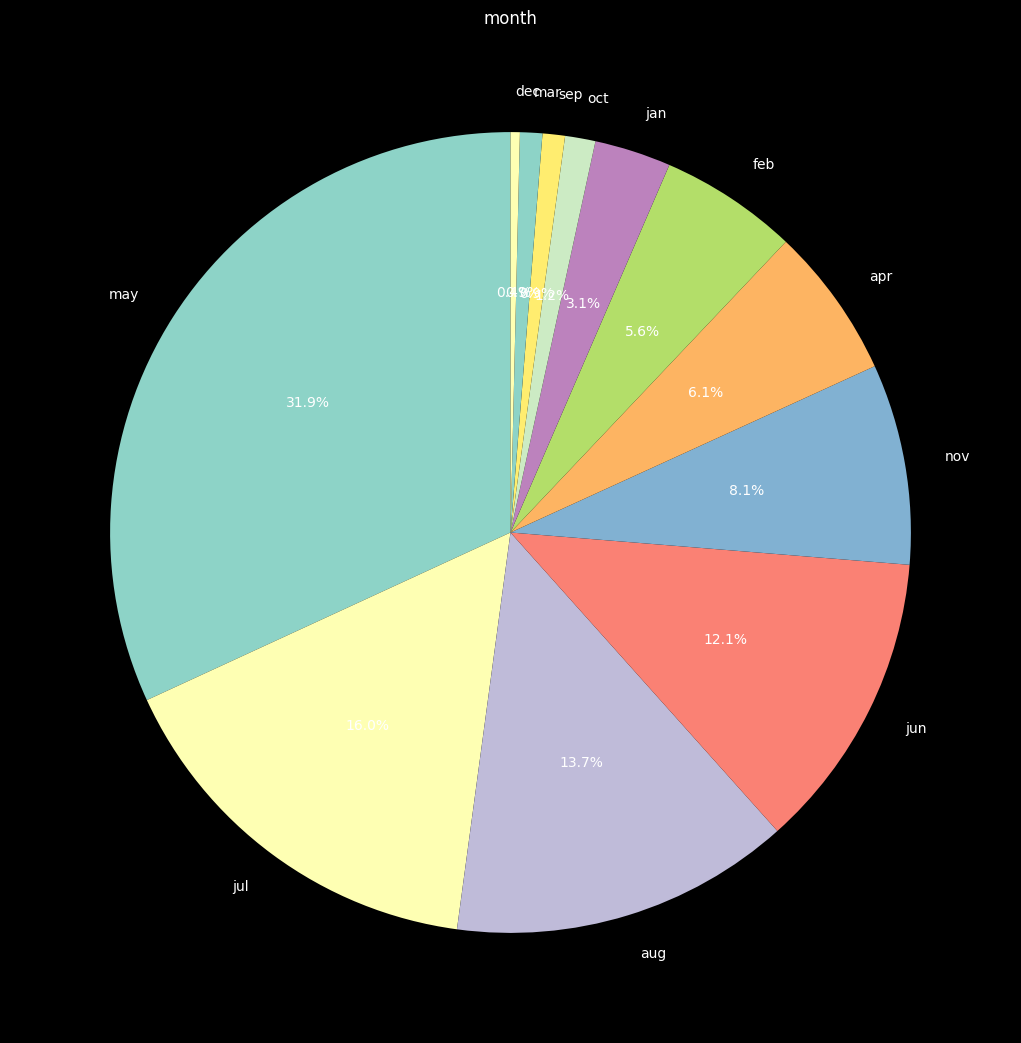

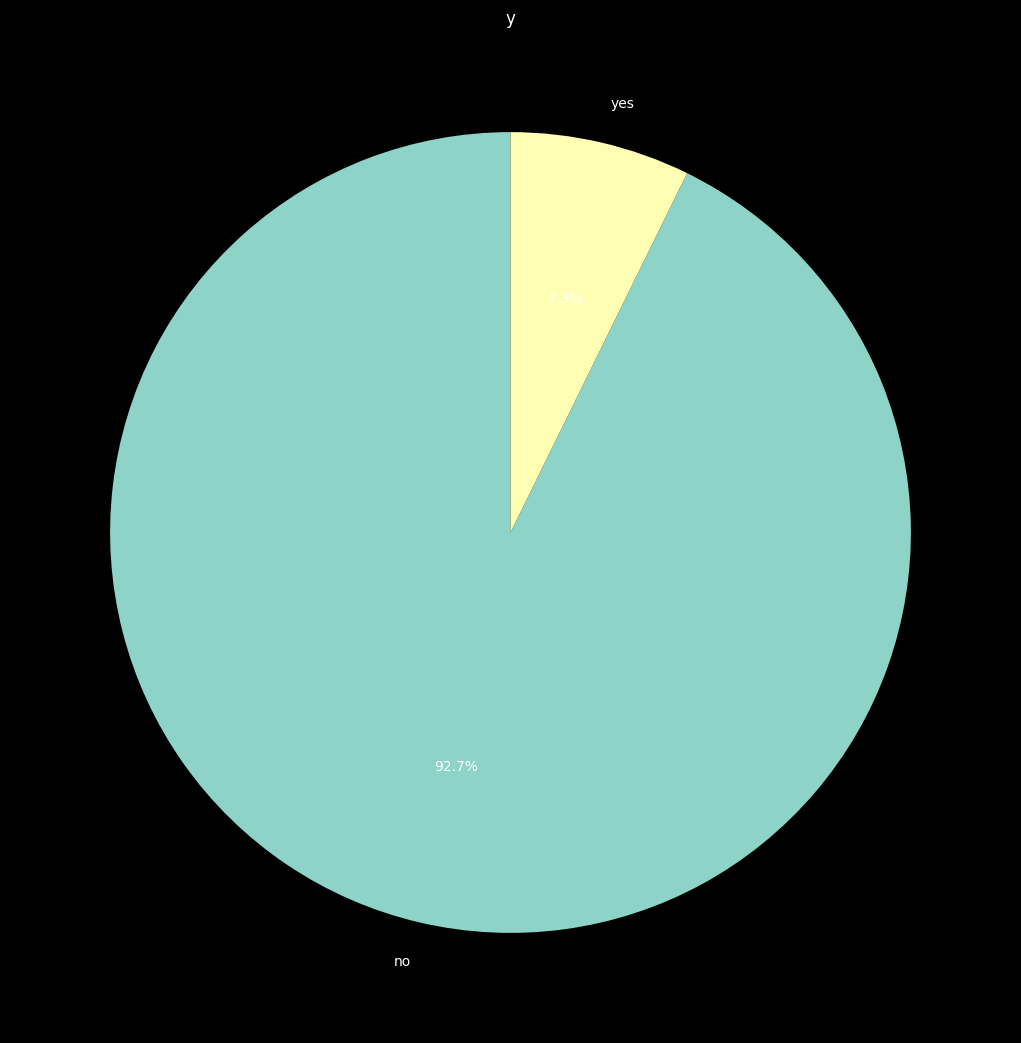

In [63]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

for column in categorical_columns:
    out = data[column].value_counts()

    fig, ax = plt.subplots()
    out.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax, figsize=(13,13)) # autopct to show percentage and starangle to start plotting from 90 degrees
    ax.set_title(f'{column}')
    ax.set_ylabel('')
    plt.show()

## Correlation/Covariance

In [64]:
import seaborn as sns

numeric_data = data.select_dtypes(include=['number'])

numeric_data.corr(method='pearson')

# works only for numerical data

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.089989,-0.006636,-0.040774,0.044884,-0.029772,-0.018609
balance,0.089989,1.000000,0.014649,0.020562,-0.014032,0.015707,0.043189
day,-0.006636,0.014649,1.000000,-0.031978,0.123322,-0.070787,-0.059054
duration,-0.040774,0.020562,-0.031978,1.000000,-0.087099,0.013673,0.016189
campaign,0.044884,-0.014032,0.123322,-0.087099,1.000000,-0.092575,-0.102391
pdays,-0.029772,0.015707,-0.070787,0.013673,-0.092575,1.000000,0.828538
previous,-0.018609,0.043189,-0.059054,0.016189,-0.102391,0.828538,1.000000


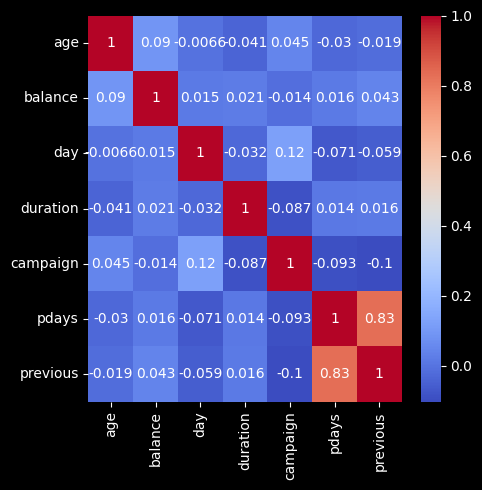

In [65]:
# figure with a larger size
plt.figure(figsize=(5, 5))

sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=True)

plt.tight_layout()  # ensure everything fits without overlapping
plt.show()

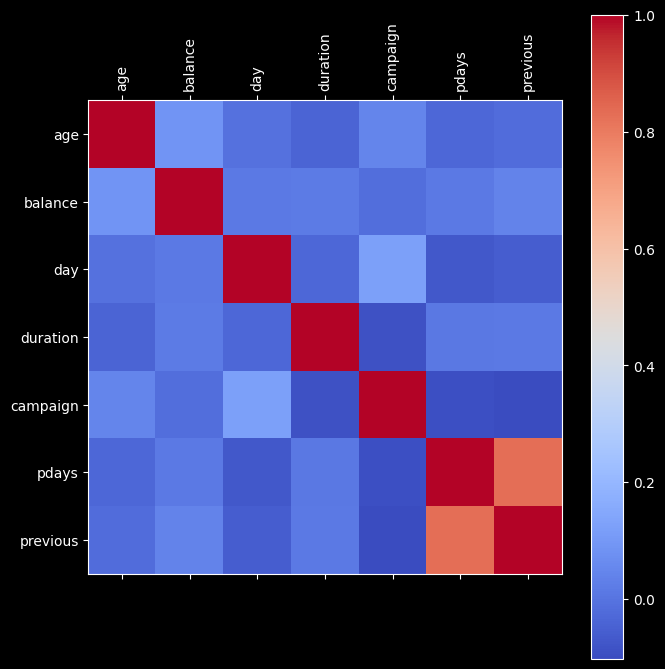

In [66]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sm = ax.matshow(numeric_data.corr(), cmap='coolwarm')

plt.xticks(range(numeric_data.select_dtypes(['number']).shape[1]), numeric_data.columns, rotation=90, ha='center')
plt.yticks(range(numeric_data.select_dtypes(['number']).shape[1]), numeric_data.columns, )

plt.colorbar(sm)

plt.tight_layout()
plt.savefig('corrmap.png', dpi=300)
plt.show()

In [67]:
numeric_data.cov()

,age,balance,day,duration,campaign,pdays,previous
age,98.372907,1.109911e+03,-0.547826,-56.099283,0.704209,-25.810548,-0.092275
balance,1109.910617,1.546413e+06,151.623383,3547.039644,-27.602209,1707.312540,26.851474
day,-0.547826,1.516234e+02,69.274231,-36.921369,1.623657,-51.497801,-0.245733
duration,-56.099283,3.547040e+03,-36.921369,19243.433407,-19.112626,165.790682,1.122794
campaign,0.704209,-2.760221e+01,1.623657,-19.112626,2.502280,-12.799961,-0.080977
pdays,-25.810548,1.707313e+03,-51.497801,165.790682,-12.799961,7640.091061,36.206985
previous,-0.092275,2.685147e+01,-0.245733,1.122794,-0.080977,36.206985,0.249955


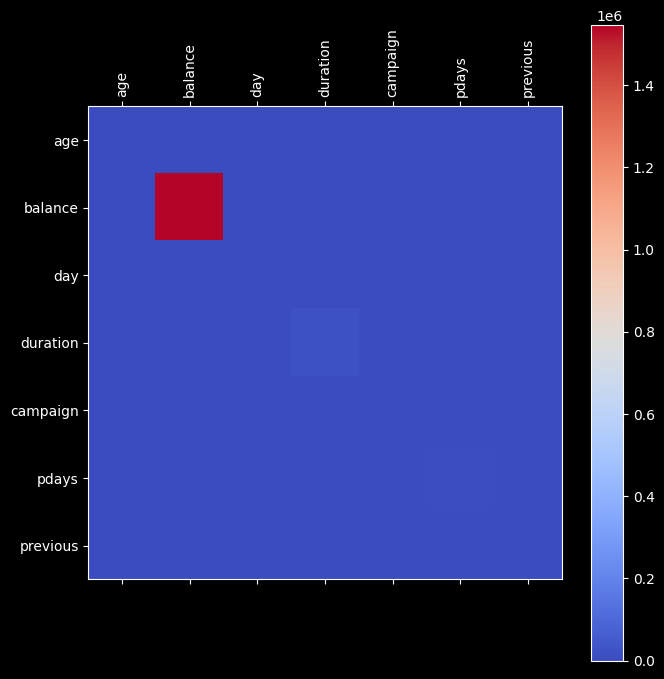

In [68]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sm = ax.matshow(numeric_data.cov(), cmap='coolwarm')

plt.xticks(range(numeric_data.shape[1]), numeric_data.columns, rotation=90, ha='center')
plt.yticks(range(numeric_data.shape[1]), numeric_data.columns, )

plt.colorbar(sm)

plt.tight_layout()
plt.savefig('covmap.png', dpi=300)
plt.show()

Covariance is an indicator of the extent to which 2 random variables are dependent on each other. A higher number denotes higher dependency. Correlation is a statistical measure that indicates how strongly two variables are related.

<h1>Covariance<h1>

<h2>Definition:<h2>
<h4>Covariance is a measure that indicates the extent to which two random variables change together. If the variables tend to show similar behavior (i.e., when one increases, the other also increases), the covariance is positive. If one variable tends to increase when the other decreases, the covariance is negative.<h4>

<h2>Interpretation:<h2>
<h4>A positive covariance indicates that the two variables move in the same direction.
A negative covariance indicates that the two variables move in opposite directions.
A covariance close to zero suggests that the variables do not have any linear relationship.<h4>

<h2>Example:<h2>
<h4>Consider the heights and weights of a group of people. If taller people tend to weigh more, the covariance between height and weight will be positive.
Conversely, if we consider the amount of exercise and weight, more exercise might correlate with less weight, resulting in a negative covariance.
However, covariance has a limitation: it is not standardized, meaning its value depends on the units of the variables. This makes it difficult to compare covariances across different data sets or variables.<h4>


<h1>Correlation<h1>

<h2>Definition:<h2>
<h4>Correlation is a standardized measure of the relationship between two variables. It adjusts the covariance by dividing by the product of the standard deviations of the two variables, resulting in a dimensionless number that lies between -1 and 1.<h4>

<h2>Interpretation:<h2>
<h4>A correlation of 1 indicates a perfect positive linear relationship: as one variable increases, the other increases in a perfectly linear manner.
A correlation of -1 indicates a perfect negative linear relationship: as one variable increases, the other decreases in a perfectly linear manner.
A correlation of 0 indicates no linear relationship between the variables.<h4>

<h2>Example:<h2>
<h4>Using the previous example of height and weight, a high positive correlation close to 1 would indicate that taller people generally weigh more in a consistent manner.
For exercise and weight, a high negative correlation close to -1 would suggest that more exercise is strongly associated with lower weight.<h4>

Key Differences
Scale and Standardization:

Covariance is not standardized and is affected by the units of the variables.
Correlation is standardized, allowing for comparison across different sets of data.
Range:

Covariance can take any value, positive or negative, and its magnitude depends on the data's scale.
Correlation ranges from -1 to 1, providing a consistent measure of relationship strength.

# Categorical variables
## Covariance using Crammer's V statistic

In [69]:
# https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
import scipy.stats as ss


def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# https://medium.com/@ktoprakucar/how-to-calculate-the-correlation-between-categorical-and-continuous-values-dcb7abf79406


In [70]:
for categorical_variable in categorical_columns[:-2]:
    confusion_matrix = pd.crosstab(data[categorical_variable], data['y'])
    print(f' Feature {categorical_variable}: Association with Target {round(cramers_v(confusion_matrix.values), 2)}')

 Feature job: Association with Target 0.13
 Feature marital: Association with Target 0.08
 Feature education: Association with Target 0.09
 Feature default: Association with Target 0.02
 Feature housing: Association with Target 0.15
 Feature loan: Association with Target 0.07
 Feature contact: Association with Target 0.01


In [71]:
data.drop(['contact', 'default'], axis=1, inplace=True)

## Feature Transformation

In [72]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

label_encoder = LabelEncoder()

data['pdays'] = data['pdays'].apply(lambda x: 0 if x == -1 else 1)
data.loc[:, 'housing'] = label_encoder.fit_transform(data['housing'])
data.loc[:, 'loan'] = label_encoder.fit_transform(data['loan'])
data.loc[:, 'y'] = label_encoder.fit_transform(data['y'])

In [82]:
# normalize
columns_to_normalize = ['age', 'balance', 'day', 'duration', 'previous', 'campaign']

data_normalized = data.copy()
scaler = MinMaxScaler()
data_normalized[columns_to_normalize] = scaler.fit_transform(data_normalized[columns_to_normalize])

data = data_normalized

In [83]:
# one-hot encoding for categorical columns
categorical_columns = ['job', 'marital', 'education', 'month']

ohe = OneHotEncoder(sparse_output=False)

encoded_array = ohe.fit_transform(data[categorical_columns])
encoded_data = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(categorical_columns), index=data.index)

data.drop(columns=categorical_columns, inplace=True)

data = pd.concat([data, encoded_data], axis=1)

In [84]:
data

,age,balance,housing,loan,day,duration,campaign,pdays,previous,y,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.769231,0.583969,1,0,0.133333,0.406299,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.500000,0.360123,1,0,0.133333,0.233071,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.288462,0.357264,1,1,0.133333,0.114961,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.557692,0.516518,1,0,0.133333,0.140157,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.326923,0.381512,1,0,0.133333,0.214173,0.000000,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,0.365385,0.508259,0,0,0.500000,0.519685,0.142857,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45202,0.307692,0.416031,0,0,0.533333,0.348031,0.000000,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45203,0.096154,0.369017,0,0,0.533333,0.414173,0.000000,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45205,0.134615,0.410525,0,1,0.533333,0.603150,0.142857,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
data.to_csv('../data/data_cleaned.csv', index=False)